In [1]:
# by Afshin Beh.

In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
# alpha: significance level
_alpha = 0.05
# confidence interval 
_ci = 1 - _alpha
# degrees of freedom numerator (dfn) 
_dfn = 3
# degrees of freedom denominator (dfd)
_dfd = 139

Alpha is the probability of rejecting the null hypothesis when the null hypothesis is true (i.e. error type I)

P-value is the probability of getting the sample data if the null hypothesis were true. The lower the p-value implies, the wekaer the null hypothesis is. The p-value indicates how extreme the data are.

_DFD is also called DFE (degrees of freedom error)._

source: https://courses.washington.edu/p209s07/lecturenotes/Week%205_Monday%20overheads.pdf

- If the p-value is less than or equal to the alpha (p< .05), then we reject the null hypothesis, and we say the result is statistically significant.
- If the p-value is greater than alpha (p > .05), then we fail to reject the null hypothesis, and we say that the result is statistically nonsignificant (n.s.). 

In [5]:
# get critical value, corresponding to confidence interval
critical_value = stats.f.ppf(q=_ci, dfn=_dfn, dfd=_dfd)
print('critical value', critical_value)

# get confidence interval coresponding to a critical value
confidence_inetval = stats.f.cdf(critical_value, dfn=_dfn, dfd=_dfd)
print('confidence interval', confidence_inetval)

critical value 2.66972623711
confidence interval 0.95


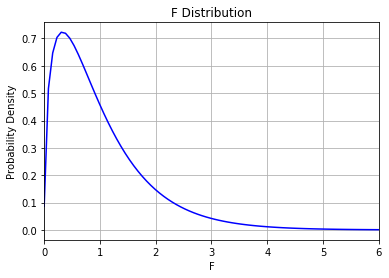

In [6]:
# f distribution 
result = stats.f(dfn=_dfn, dfd=_dfd, loc=0, scale=1)
x = np.linspace(result.ppf(0.0001), result.ppf(0.9999), 100)
y = result.pdf(x)

# create a plot to display the F-distribution
plt.xlim(0, 6)
plt.grid(True)
plt.title('F Distribution')
plt.xlabel("F")
plt.ylabel("Probability Density")
plt.plot(x, y, 'b-')

In [7]:
# Probability to pass a cutoff value

# statistics
x = np.random.normal(size=1)

p_value = result.sf(x)
if p_value < _alpha:
    print('F cutoff at: ', x, p_value)
else:
    print('F No cutoff', x, p_value)

F No cutoff [ 0.17165657] [ 0.91539325]


### Regression with Intercept:

- simple regression: $Y=\beta_0+\beta_1X$
- multiple regression: $Y=\beta_0+\beta_1X_1+\beta_2X_2+...+\beta_nX_n$


- __n:__ number of observations
- __p:__ number of regression parameters (predictors)


To decide what predictors to be included in the model, they can be added one by one to the model by replacing another predictor in the model, and if R-squared improves, it can be concluded than the new added predictor is a good predictor.

### The F-test
Source: http://facweb.cs.depaul.edu/sjost/csc423/documents/f-test-reg.htm

1) State the null and alternative hypothesis:
 
- $H_0: \beta_1 = \beta_2 = , ... , =\beta_{p-1}$
- $H_1: \beta_j \ne 0\ for\ some\ j$

2) Compute the test statistic: F statistics

3) Find a $(1-\alpha)100\%$ confidence interval I for (DFN, DFE) degrees of freedom using an F-table or statistical software
 
4) Accept the null hypothesis if $F \in CI$; reject it if $F \notin CI$
 
5) Determine the p-value. To obtain the exact p-value, use statistical software. However, we can find a rough approximation to the p-value by examining the other entries in the F-table for (DFN, DFE) degrees of freedom
 